In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('dc_crime_add_vars.csv')

In [2]:
#Determine the time covered by the data

print(df.shape)
print(df.info())
print(df.head(2))

print('Data range in crime data:')
print(df['date'].min())
print(df['date'].max())



(342867, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342867 entries, 0 to 342866
Data columns (total 32 columns):
Unnamed: 0              342867 non-null int64
X                       342867 non-null int64
REPORT_DAT              342867 non-null object
SHIFT                   342867 non-null object
OFFENSE                 342867 non-null object
METHOD                  342867 non-null object
BLOCK                   342867 non-null object
DISTRICT                342667 non-null float64
PSA                     342616 non-null float64
WARD                    342867 non-null int64
ANC                     342867 non-null object
NEIGHBORHOOD_CLUSTER    338162 non-null object
BLOCK_GROUP             341776 non-null object
CENSUS_TRACT            341776 non-null float64
VOTING_PRECINCT         342783 non-null object
CCN                     342867 non-null int64
START_DATE              342854 non-null object
END_DATE                331216 non-null object
XBLOCK                  342867 

<B>This data set provides almost 10 years of crime data in Washington D.C.  DC is divided into 8 Wards and the following analyses uses Wards to segment the data</B>

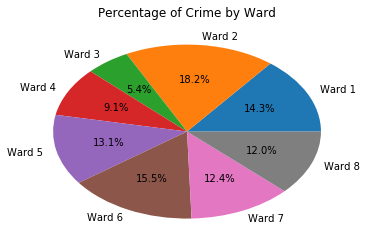

In [24]:
##This will generate a pie graph showing the percentage of crime incidents by Ward

total_rows = df.index.max() + 1
label = []

df2 = df.groupby(['WARD']).aggregate(np.count_nonzero)
df2['percent'] = df2['DISTRICT']/total_rows

for item in (df2.index):
    label.append('Ward {}'.format(item))
    
plt.pie(df2['percent'], labels=label, autopct='%1.1f%%')
plt.title('Percentage of Crime by Ward')
plt.show()

<B>Ward 2 accounted for 18.2% of the crime reported over this ~10 year period.  That is over 3 times as Ward 3 which accounted for 5.4% of the crime incidents reported</B>

Text(0.5,0,'Hour')

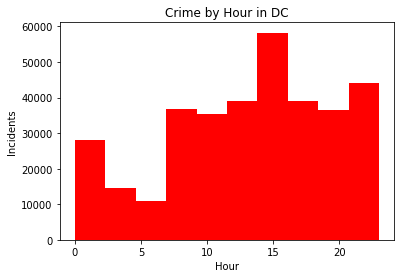

In [25]:
##This historgram graphs the frequency of what hour of the day crimes occur in DC
plt.hist(df['hour'], color='red')
plt.title('Crime by Hour in DC')
plt.ylabel('Incidents')
plt.xlabel('Hour')



<B>Across the ~10 years of crime data, most crimes take place in the 3 PM hour.  Crime frequency from 7 AM to midnight, looks pretty consistent, with a spike in the 10 and 11 PM hours</B>

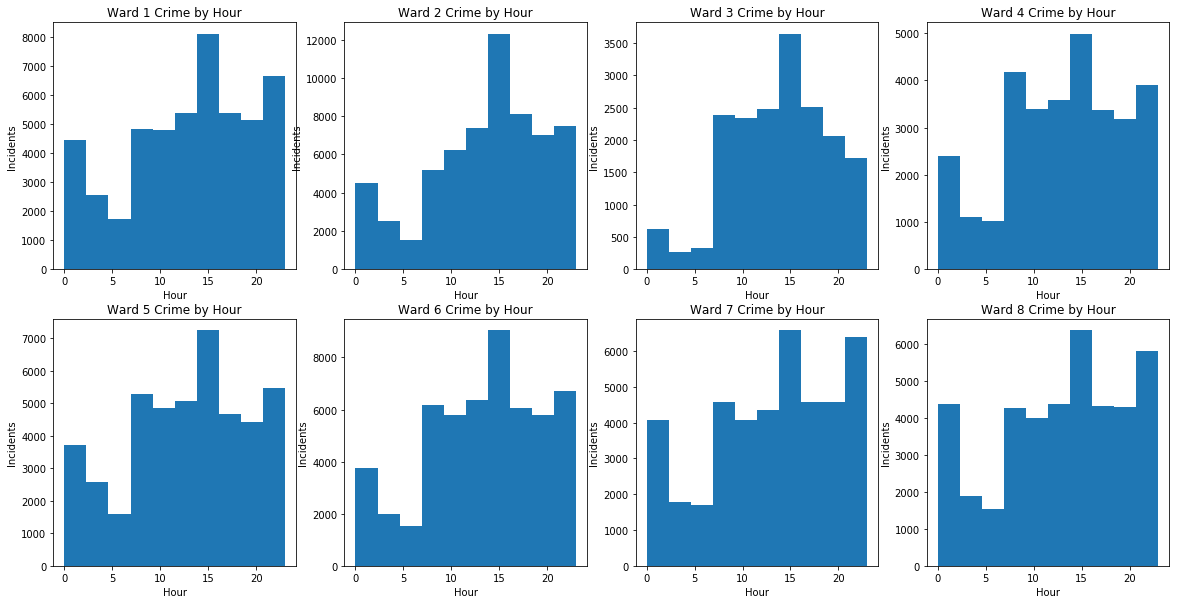

In [11]:
##Couldn't figure out how to create sub-plots to do what I did above, to have those graphs show up larger

##df.loc[lambda df: df['WARD'] == 1, ['hour']]

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.hist(df.loc[lambda df: df['WARD'] == 1, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 1 Crime by Hour')

plt.subplot(2, 4, 2)
plt.hist(df.loc[lambda df: df['WARD'] == 2, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 2 Crime by Hour')

plt.subplot(2, 4, 3)
plt.hist(df.loc[lambda df: df['WARD'] == 3, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 3 Crime by Hour')

plt.subplot(2, 4, 4)
plt.hist(df.loc[lambda df: df['WARD'] == 4, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 4 Crime by Hour')

plt.subplot(2, 4, 5)
plt.hist(df.loc[lambda df: df['WARD'] == 5, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 5 Crime by Hour')

plt.subplot(2, 4, 6)
plt.hist(df.loc[lambda df: df['WARD'] == 6, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 6 Crime by Hour')

plt.subplot(2, 4, 7)
plt.hist(df.loc[lambda df: df['WARD'] == 7, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 7 Crime by Hour')

plt.subplot(2, 4, 8)
plt.hist(df.loc[lambda df: df['WARD'] == 8, 'hour'])
plt.ylabel('Incidents')
plt.xlabel('Hour')
plt.title('Ward 8 Crime by Hour')

plt.tight_layout()
plt.show()

<B>The spike in the 3 pm hour is consistent across wards.  All patterns are consistent except for Ward 3.  Where all other wards, show a spike in crime in the 10 PM and 11 PM hours, Ward 3 actually sees a decrease.</B>  

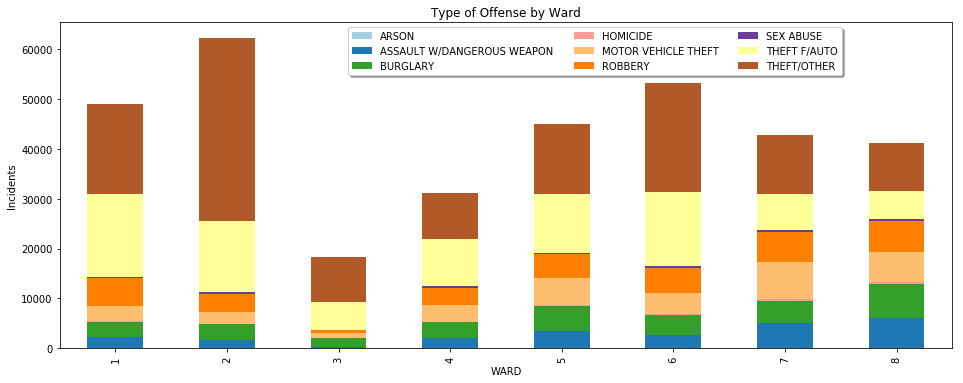

In [23]:
##Wanted to drill into the types of offense by Ward so created a bar graph based on a pivot table
##used PSA, but could have used any other value since I am interested in the count

    
offense_by_ward = df.pivot_table(index='WARD', columns='OFFENSE', values='PSA', aggfunc='count')

offense_by_ward.plot(kind='bar', figsize=[16,6], stacked=True, colormap='Paired') # area plot

plt.title('Type of Offense by Ward')
plt.ylabel('Incidents')
plt.legend(loc='upper center', bbox_to_anchor=(.6, 1),
          ncol=3, fancybox=True, shadow=True)

plt.show()

<B>Theft/Other is the most prevalent offense across Wards, followed by Theft F/Auto.  As seen in previous analyses, Ward 3 is the "safest" Ward, with relatively less crime overall and relatively negligible violent cirmes (e.g. Assalut W/Dangerous Weapon).  I was surprised, concerned that the ammount of Sex Abuse reported in some wards was enough to register on this chart.</B>